In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch import nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
modelUT = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
modelUT = nn.Sequential(
    modelUT,
    nn.ReLU(),
    nn.Linear(1000, 10)
)
print(modelUT.eval())
modelUT.to(device)

modelPT = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
for p in modelPT.parameters():
    p.requires_grad = False

modelPT = nn.Sequential(
    modelPT,
    nn.ReLU(),
    nn.Linear(1000, 10)
)
print(modelPT.eval())
modelPT.to(device)

for p in modelPT.parameters():
    print(p.requires_grad)


Using cache found in C:\Users\axelk/.cache\torch\hub\pytorch_vision_v0.10.0


Sequential(
  (0): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
      (1):

Using cache found in C:\Users\axelk/.cache\torch\hub\pytorch_vision_v0.10.0


Sequential(
  (0): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
      (1):

In [4]:
transform = transforms.Compose([
    transforms.Resize(64),
    #transforms.CenterCrop(64),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_data = torchvision.datasets.CIFAR10(
    train=True,
    root="data",
    download=True,
    transform=transform
)
test_data = torchvision.datasets.CIFAR10(
    train=False,
    root="data",
    download=True,
    transform=transform
)
train_set = DataLoader(train_data, batch_size=64, shuffle=True)
test_set = DataLoader(test_data, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [62]:
epochs = 10

def train_model(model, loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)
    for epoch in range(epochs):
        #print(f"epoch: {epoch + 1}")
        run_loss = 0.0
        model.train(True)

        for batch_nr, (data, labels) in enumerate(loader):
            data = data.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            prediction = model(data)

            loss = criterion(prediction, labels)

            loss.backward()

            optimizer.step()

            

            run_loss += loss.item()

        print("[%d, %5d], loss: %.3f " % (epoch + 1, batch_nr + 1, run_loss / (batch_nr + 1)))
    return model

In [39]:
trainedUT = train_model(modelUT, train_set)

[1,   782], loss: 1.878 
[2,   782], loss: 1.858 
[3,   782], loss: 1.841 
[4,   782], loss: 1.819 
[5,   782], loss: 1.742 
[6,   782], loss: 1.638 
[7,   782], loss: 1.572 
[8,   782], loss: 1.519 
[9,   782], loss: 1.460 
[10,   782], loss: 1.399 
[11,   782], loss: 1.336 
[12,   782], loss: 1.275 
[13,   782], loss: 1.197 
[14,   782], loss: 1.129 
[15,   782], loss: 1.080 
[16,   782], loss: 1.022 
[17,   782], loss: 0.971 
[18,   782], loss: 0.916 
[19,   782], loss: 0.874 
[20,   782], loss: 0.812 
[21,   782], loss: 0.766 
[22,   782], loss: 0.715 
[23,   782], loss: 0.662 
[24,   782], loss: 0.618 
[25,   782], loss: 0.574 
[26,   782], loss: 0.529 
[27,   782], loss: 0.479 
[28,   782], loss: 0.439 
[29,   782], loss: 0.389 
[30,   782], loss: 0.347 
[31,   782], loss: 0.318 
[32,   782], loss: 0.283 
[33,   782], loss: 0.263 
[34,   782], loss: 0.217 
[35,   782], loss: 0.188 
[36,   782], loss: 0.169 
[37,   782], loss: 0.149 
[38,   782], loss: 0.137 
[39,   782], loss: 0.

In [16]:
trainedPT = train_model(modelPT, train_set)

[1,   782], loss: 3.090 
[2,   782], loss: 2.633 
[3,   782], loss: 2.584 
[4,   782], loss: 2.427 
[5,   782], loss: 2.497 
[6,   782], loss: 2.431 
[7,   782], loss: 2.442 
[8,   782], loss: 2.392 
[9,   782], loss: 2.420 
[10,   782], loss: 2.411 
[11,   782], loss: 2.366 
[12,   782], loss: 2.414 
[13,   782], loss: 2.414 
[14,   782], loss: 2.360 
[15,   782], loss: 2.356 
[16,   782], loss: 2.311 
[17,   782], loss: 2.326 
[18,   782], loss: 2.342 
[19,   782], loss: 2.356 
[20,   782], loss: 2.325 
[21,   782], loss: 2.339 
[22,   782], loss: 2.317 
[23,   782], loss: 2.361 
[24,   782], loss: 2.300 
[25,   782], loss: 2.326 
[26,   782], loss: 2.302 
[27,   782], loss: 2.325 
[28,   782], loss: 2.313 
[29,   782], loss: 2.287 
[30,   782], loss: 2.332 
[31,   782], loss: 2.282 
[32,   782], loss: 2.296 
[33,   782], loss: 2.279 
[34,   782], loss: 2.341 
[35,   782], loss: 2.324 
[36,   782], loss: 2.273 
[37,   782], loss: 2.335 
[38,   782], loss: 2.322 
[39,   782], loss: 2.

In [17]:
torch.save(trainedUT.state_dict(), "./Exercise2/trainedUT")
torch.save(trainedPT.state_dict(), "./Exercise2/trainedPT")

In [18]:
modelUT.load_state_dict(torch.load("./Exercise2/trainedUT"))
modelPT.load_state_dict(torch.load("./Exercise2/trainedPT"))

<All keys matched successfully>

In [20]:
def accuracy(model, loader):
    correct = 0
    all = 0
    with torch.no_grad():
        for batch_nr,(data,label) in enumerate(loader):
            data = data.to(device)
            label = label.to(device)
            pred = model(data)

            correct += (torch.argmax(pred,1)== label).sum()
            
            all += (label.size(0))
    return correct / all

In [21]:
accUT = accuracy(modelUT, test_set)
accPT = accuracy(modelPT, test_set)

print("Not pre-trained: ", accUT, " Pre-trained: ", accPT)

Not pre-trained:  tensor(0.6927, device='cuda:0')  Pre-trained:  tensor(0.4099, device='cuda:0')


In [57]:
modelCNN = nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3, padding='same'),
    nn.LeakyReLU(),
    nn.MaxPool2d(kernel_size=2, stride=(2,2)),
    nn.Conv2d(in_channels=6,out_channels=6,kernel_size=3),
    nn.LeakyReLU(),
    nn.MaxPool2d(kernel_size=2, stride=(2,2)),
    nn.Flatten(),
    nn.Linear(6*6*6, 10),
    nn.Softmax(1)
)

modelCNN.to(device)

modelVGG = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=False)
modelVGG = nn.Sequential(
    modelVGG,
    nn.ReLU(),
    nn.Linear(1000, 10)
)
modelVGG.to(device)



Using cache found in C:\Users\axelk/.cache\torch\hub\pytorch_vision_v0.10.0


Sequential(
  (0): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): C

In [60]:
transformMNIST = transforms.Compose([
    transforms.Resize(32),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataMNIST = torchvision.datasets.MNIST(
    train=True,
    root="data",
    download=True,
    transform=transformMNIST
)
test_dataMNIST = torchvision.datasets.MNIST(
    train=False,
    root="data",
    download=True,
    transform=transformMNIST
)
train_setMNIST = DataLoader(train_dataMNIST, batch_size=64, shuffle=True)
test_setMNIST = DataLoader(test_dataMNIST, batch_size=64, shuffle=False)

torch.Size([1, 28, 28])


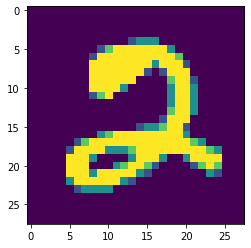

In [40]:
dataiter = iter(train_setMNIST)

images, labels = dataiter.next()
img = images[0].numpy()
print(images[0].shape)
img = np.transpose(img, (1,2,0))
plt.imshow(img)

In [63]:
trainedMNIST = train_model(modelVGG, train_setMNIST)

[1,   938], loss: 0.064 
[2,   938], loss: 0.049 
[3,   938], loss: 0.039 
[4,   938], loss: 0.030 
[5,   938], loss: 0.025 
[6,   938], loss: 0.020 
[7,   938], loss: 0.016 
[8,   938], loss: 0.013 
[9,   938], loss: 0.011 
[10,   938], loss: 0.010 


In [64]:
torch.save(trainedMNIST.state_dict(), "./Exercise2/trainedVGG")

In [50]:
modelCNN.load_state_dict(torch.load("./Exercise2/trainedMNIST"))

<All keys matched successfully>

In [65]:
accMNIST = accuracy(trainedMNIST, test_setMNIST)
print(accMNIST)

tensor(0.9918, device='cuda:0')


In [66]:
transformSVHN = transforms.Compose([
    transforms.Resize(28),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataSVHN = torchvision.datasets.SVHN(
    split="train",
    root="data",
    download=True,
    transform=ToTensor()
)
test_dataSVHN = torchvision.datasets.SVHN(
    split="test",
    root="data",
    download=True,
    transform=ToTensor()
)
train_setSVHN = DataLoader(train_dataSVHN, batch_size=64, shuffle=True)
test_setSVHN = DataLoader(test_dataSVHN, batch_size=64, shuffle=False)

Using downloaded and verified file: data\train_32x32.mat
Using downloaded and verified file: data\test_32x32.mat


In [81]:
for param in modelVGG.parameters():
    param.requires_grad = False

modelVGG[2] = nn.Linear(1000, 10)
modelVGG.to(device)


Sequential(
  (0): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): C

In [82]:
trainedSVHN = train_model(modelVGG, train_setSVHN)

[1,  1145], loss: 2.073 
[2,  1145], loss: 1.997 
[3,  1145], loss: 1.974 
[4,  1145], loss: 1.962 
[5,  1145], loss: 1.952 
[6,  1145], loss: 1.943 
[7,  1145], loss: 1.936 
[8,  1145], loss: 1.931 
[9,  1145], loss: 1.926 
[10,  1145], loss: 1.922 


In [83]:
accSVHN = accuracy(trainedSVHN, test_setSVHN)
print(accSVHN)

tensor(0.3881, device='cuda:0')
